# JuxtBoard User Study

## Imports

In [1]:
import numpy as np
from scipy import stats
import statsmodels.stats.proportion as smp
import pandas as pd
import matplotlib.pyplot as plt
import plot_likert

## Helper Functions

In [2]:
def print_stats(data, hist_bins=10, hist_size=(8,4)):
    print('--- Statistics ----')
    display(data.describe())
    print('\n')
    print('--- Counting Unique Values ----')
    display(data.value_counts())
    print('\n')
    print('--- Basic Histogram ----')
    data.hist(bins=hist_bins, figsize=hist_size)
    plt.show()
    
def calculate_sus(data):
    for i in range(len(data.columns)):
        if i % 2:
            data.iloc[:,i] = 7 - data.iloc[:,i]
        else:
            data.iloc[:,i] = data.iloc[:,i] - 1

    data['Score'] = data.iloc[:,0:10].sum(axis=1)
    data['Score 100'] = data['Score'] * (100/60)
    return data

def confidence_interval_t(data, confidence_level=0.95):
    return stats.t.interval(confidence_level, data.count()-1, data.mean(), data.sem())
    

## Load Excel

In [3]:
data = pd.read_excel('data/userstudies/juxtboard-questionnaire-responses.xlsx', sheet_name=None)  

## Basic Data

In [4]:
data_basic = data['Basic']

# Translating Genre from Portuguese to English
data_basic['Genre'].replace('Masculino','Male',inplace=True)
data_basic['Genre'].replace('Feminino','Female',inplace=True)
data_basic['Genre'].replace('Prefiro não responder','Prefer not to say',inplace=True)

# Translating Education from Portuguese to English
data_basic['Education'].replace('Educação Básica','Basic Education',inplace=True)
data_basic['Education'].replace('Educação Secundária','Secondary Education',inplace=True)
data_basic['Education'].replace('Educação Pós-Secundária','Post-Secondary Education',inplace=True)
data_basic['Education'].replace('Educação Pós-Secundária','Post-Secondary Education',inplace=True)
data_basic['Education'].replace('Licenciatura','Bachelor\'s Degree',inplace=True)
data_basic['Education'].replace('Mestrado','Master\'s Degree',inplace=True)
data_basic['Education'].replace('Doutoramento','Doctoral Degree',inplace=True)
data_basic['Education'].replace('Prefiro não responder','Prefer not to say',inplace=True)

# Translating Type of Devices from Portuguese to English
data_basic['Type of Devices'].replace({'Computador de secretária':'Desktop'}, regex=True ,inplace=True)
data_basic['Type of Devices'].replace({'Computador portátil':'Laptop'}, regex=True, inplace=True)

# Translating Test mode from Portuguese to English
data_basic['Test Mode'].replace('PRIMEIRO em modo "Multi-Dispositivo" e DEPOIS em modo "Dispositivo Único".','Single Device > Cross-Device',inplace=True)
data_basic['Test Mode'].replace('PRIMEIRO em modo "Dispositivo Único" e DEPOIS em modo "Multi-Disposito".','Cross-Device > Single Device',inplace=True)

#display(data_basic)

### Age

--- Statistics ----


count    27.000000
mean     23.481481
std       9.795487
min      19.000000
25%      19.500000
50%      20.000000
75%      22.000000
max      60.000000
Name: Age, dtype: float64



--- Counting Unique Values ----


20    11
19     7
22     3
34     1
51     1
21     1
23     1
26     1
60     1
Name: Age, dtype: int64



--- Basic Histogram ----


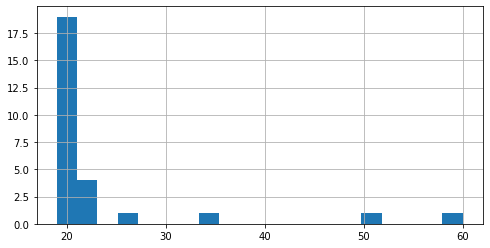

Population Standard Deviation:
9.612377708591147


In [5]:
data_basic_age = data_basic['Age']
print_stats(data_basic_age, hist_bins=20)
print('Population Standard Deviation:')
print(data_basic_age.std(ddof=0))

### Gender

--- Statistics ----


count       27
unique       2
top       Male
freq        23
Name: Genre, dtype: object



--- Counting Unique Values ----


Male      23
Female     4
Name: Genre, dtype: int64



--- Basic Histogram ----


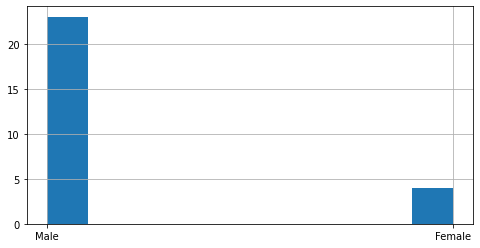

In [6]:
#TODO: This should be Gender. I don't know why I called "Genre"
data_basic_genre = data_basic['Genre']
print_stats(data_basic_genre)

### Education

--- Statistics ----


count                      27
unique                      4
top       Secondary Education
freq                       19
Name: Education, dtype: object



--- Counting Unique Values ----


Secondary Education         19
Post-Secondary Education     5
Bachelor's Degree            2
Master's Degree              1
Name: Education, dtype: int64



--- Basic Histogram ----


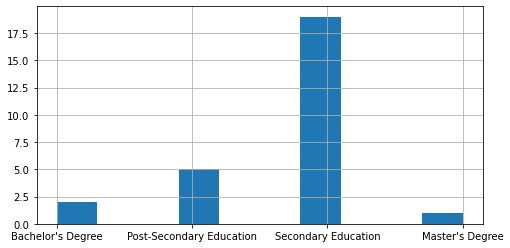

In [7]:
data_basic_education = data_basic['Education']
print_stats(data_basic_education)

### Type of Devices

In [8]:
data_basic_type_of_devices = data_basic['Type of Devices'].map(lambda x: [i.strip() for i in x.split(",")])
print('--- Statistics ----')
display(data_basic_type_of_devices.describe())

#print('--- Basic Histogram ----')
#data_basic_type_of_devices.hist()

--- Statistics ----


count                                          27
unique                                         15
top       [Desktop, Laptop, Smartphone, Smart TV]
freq                                            5
Name: Type of Devices, dtype: object

--- Statistics ----


count    27.000000
mean      3.666667
std       1.176697
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       7.000000
Name: Type of Devices, dtype: float64



--- Counting Unique Values ----


4    11
3     8
2     4
5     2
6     1
7     1
Name: Type of Devices, dtype: int64



--- Basic Histogram ----


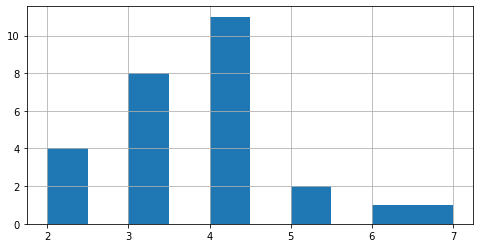

In [9]:
data_number_of_devices = data_basic_type_of_devices.apply(len)
print_stats(data_number_of_devices)

#print('Population Standard Deviation:')
#print(data_number_of_devices.std(ddof=0))

--- Statistics ----


count    27.000000
mean      6.037037
std       1.315046
min       2.000000
25%       5.000000
50%       7.000000
75%       7.000000
max       7.000000
Name: Usage of Multiple-Devices, dtype: float64



--- Counting Unique Values ----


7    14
5     6
6     5
2     1
3     1
Name: Usage of Multiple-Devices, dtype: int64



--- Basic Histogram ----


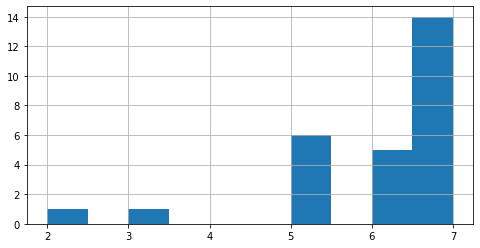

In [10]:
data_basic_usage_multiple_devices = data_basic['Usage of Multiple-Devices']
print_stats(data_basic_usage_multiple_devices)

#print('Population Standard Deviation:')
#print(data_basic_usage_multiple_devices.std(ddof=0))

#### Percentage of Users that User Multiple Devices Sometimes or More Often

In [11]:
(data_basic_usage_multiple_devices[data_basic_usage_multiple_devices >= 5].count()/data_basic_usage_multiple_devices.count())*100

92.5925925925926

### Test Mode

--- Statistics ----


count                               27
unique                               2
top       Cross-Device > Single Device
freq                                14
Name: Test Mode, dtype: object



--- Counting Unique Values ----


Cross-Device > Single Device    14
Single Device > Cross-Device    13
Name: Test Mode, dtype: int64



--- Basic Histogram ----


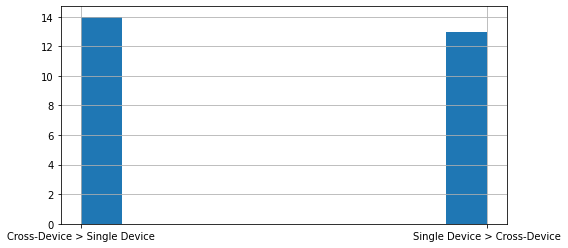

In [12]:
data_basic_test_mode = data_basic['Test Mode']
print_stats(data_basic_test_mode)

## SUS - Single Device Mode

#### Questions

1. I think that I would like to use this system frequently.
2. I found the system unnecessarily complex.
3. I thought the system was easy to use.
4. I think that I would need the support of a technical person to be able to use this system.
5. I found the various functions in this system were well integrated.
6. I thought there was too much inconsistency in this system.
7. I would imagine that most people would learn to use this system very quickly.
8. I found the system very cumbersome to use.
9. I felt very confident using the system.
10. I needed to learn a lot of things before I could get going with this system.

In [13]:
data_sus_single_device = calculate_sus(data['SUS Single Device'].copy().dropna())
#data_sus_single_device

#### Mean Score 100

In [14]:
print(data_sus_single_device['Score 100'].mean())

85.67901234567901


#### General Stats

In [15]:
data_sus_single_device.describe()
#print_stats(data_sus_single_device)

,SUS1,SUS2,SUS3,SUS4,SUS5,SUS6,SUS7,SUS8,SUS9,SUS10,Score,Score 100
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,4.222222,5.074074,5.185185,5.481481,5.333333,5.222222,5.037037,5.555556,4.814815,5.481481,51.407407,85.679012
std,1.368136,0.675160,0.735738,0.579812,0.620174,1.012739,0.854017,0.506370,0.735738,0.848998,3.586934,5.978224
min,1.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,5.000000,3.000000,2.000000,46.000000,76.666667
25%,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,48.500000,80.833333
50%,4.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,6.000000,5.000000,6.000000,51.000000,85.000000
75%,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,54.000000,90.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,57.000000,95.000000


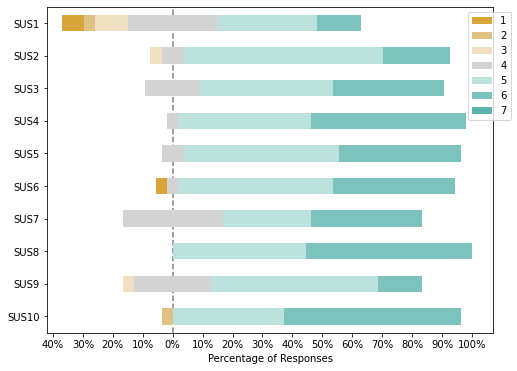

In [16]:
data_sus_single_device_res = data_sus_single_device.iloc[:,:10]
ax = plot_likert.plot_likert(pd.DataFrame(data_sus_single_device_res), np.arange(1,8), plot_percentage=True, colors=plot_likert.colors.likert7, figsize=(8,6));
ax.figure.savefig('out/juxtboard-sus-single-device.pdf', bbox_inches='tight')

#### Confidence Interval

In [17]:
confidence_interval_t(data_sus_single_device['Score 100'])

(83.3141058349677, 88.04391885639032)

#### Per-question Stats

In [18]:
##Uncomment if you need these stats
#for column in data_sus_single_device:
    #print_stats(data_sus_single_device[column])

## SUS - Cross-Device Mode

#### Questions

1. I think that I would like to use this system frequently.
2. I found the system unnecessarily complex.
3. I thought the system was easy to use.
4. I think that I would need the support of a technical person to be able to use this system.
5. I found the various functions in this system were well integrated.
6. I thought there was too much inconsistency in this system.
7. I would imagine that most people would learn to use this system very quickly.
8. I found the system very cumbersome to use.
9. I felt very confident using the system.
10. I needed to learn a lot of things before I could get going with this system.

In [19]:
data_sus_multi_device = calculate_sus(data['SUS Multi-Device'].copy().dropna())
#data_sus_multi_device

#### Mean Score 100

In [20]:
print(data_sus_multi_device['Score 100'].mean())

89.87654320987657


#### General Stats

In [21]:
data_sus_multi_device.describe()
#print_stats(data_sus_multi_device)

,SUS1,SUS2,SUS3,SUS4,SUS5,SUS6,SUS7,SUS8,SUS9,SUS10,Score,Score 100
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,5.296296,5.370370,5.444444,5.555556,5.592593,5.185185,5.222222,5.666667,5.148148,5.444444,53.925926,89.876543
std,0.992852,0.687702,0.800641,0.577350,0.693889,1.301982,0.891556,0.480384,0.769800,0.847319,5.075779,8.459632
min,2.000000,3.000000,3.000000,4.000000,3.000000,1.000000,3.000000,5.000000,4.000000,2.000000,44.000000,73.333333
25%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,50.000000,83.333333
50%,6.000000,5.000000,6.000000,6.000000,6.000000,5.000000,5.000000,6.000000,5.000000,6.000000,55.000000,91.666667
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,58.500000,97.500000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,60.000000,100.000000


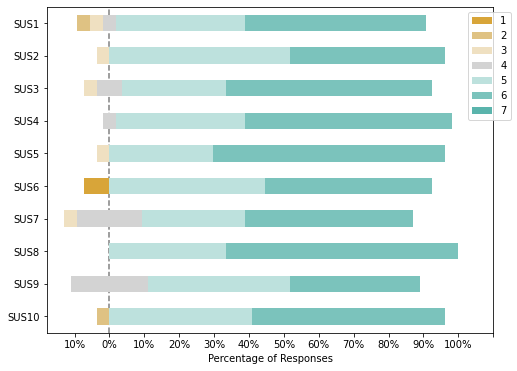

In [22]:
data_sus_multi_device_res = data_sus_multi_device.iloc[:,:10]
ax = plot_likert.plot_likert(pd.DataFrame(data_sus_multi_device_res), np.arange(1,8), plot_percentage=True, colors=plot_likert.colors.likert7, figsize=(8,6));
ax.figure.savefig('out/juxtboard-sus-cross-device.pdf', bbox_inches='tight')

#### Confidence Interval

In [23]:
confidence_interval_t(data_sus_multi_device['Score 100'])

(86.53002435903976, 93.22306206071339)

#### Per-question Stats

In [24]:
##Uncomment if you need these stats
#for column in data_sus_multi_device:
    #print_stats(data_sus_multi_device[column])

## SUS Single Device vs. SUS Cross-Device

### Dependent t-test for paired samples

In [25]:
stats.ttest_rel(data_sus_multi_device['Score 100'], data_sus_single_device['Score 100'])

Ttest_relResult(statistic=3.2302166491992086, pvalue=0.003342407697663785)

### Wilcoxon signed-rank test

In [26]:
stats.wilcoxon(data_sus_multi_device['Score 100'], data_sus_single_device['Score 100'])

WilcoxonResult(statistic=49.0, pvalue=0.003852498355866272)

### Single Device vs. SUS Cross-Device

#### Questions (Portuguese)
1. Em que modo de utilização foi mais fácil manipular as colecções de notas na aplicação (por exemplo, seleccioná-las, adicioná-las, partilhá-las, renomeá-las ou removê-las).
2. Em que modo de utilização foi mais fácil gerir as notas na aplicação (por exemplo, seleccioná-las, visualizá-las, adicioná-las, renomeá-las ou removê-las).
3. Em que modo de utilização foi mais fácil colaborar e mostrar notas aos outros participantes?
4. Indique o grau de preferência entre os dois modos de interacção do JuxtBoard caso esteja a utilizar a aplicação para realizar uma tarefa sozinho.
5. Indique o grau de preferência entre os dois modos de interacção do JuxtBoard caso se encontre numa situação em que esteja a utilizar a aplicação e haja necessidade de colaborar com outros utilizadores.

In [27]:
data_sd_md = data['SD vs. MD'].copy().dropna()
data_sd_md.iloc[:,0:5] = data_sd_md.iloc[:,0:5] - 4
#data_sd_md

--- Statistics ----


,SDMD1,SDMD2,SDMD3,SDMD4,SDMD5
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.518519,0.629630,2.444444,-0.740741,2.518519
std,1.014145,1.148516,1.012739,2.176670,1.014145
min,-2.000000,-2.000000,-1.000000,-3.000000,-1.000000
25%,0.000000,0.000000,2.000000,-2.000000,2.500000
50%,0.000000,0.000000,3.000000,-2.000000,3.000000
75%,1.000000,1.500000,3.000000,0.500000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000




--- Counting Unique Values ----


SDMD1  SDMD2  SDMD3  SDMD4  SDMD5
 0      0      3     -3      3       3
        2      3     -3      3       2
 2      0      3      0      3       2
 0      3      3     -2      3       1
 2      2      2      3      3       1
        0      3     -2      3       1
 1      2      3      3      3       1
                     -2      3       1
        1      2     -2      2       1
        0      3      3      3       1
               0     -1      0       1
 0      3      3      3      3       1
-2     -2      2      1      1       1
 0      0      1     -2      2       1
        1     -1      0     -1       1
        0      3      3      3       1
                      0      3       1
                     -2      3       1
                     -3      2       1
               2      1      3       1
                     -2      3       1
                             2       1
 3      1      3     -2      3       1
dtype: int64



--- Basic Histogram ----


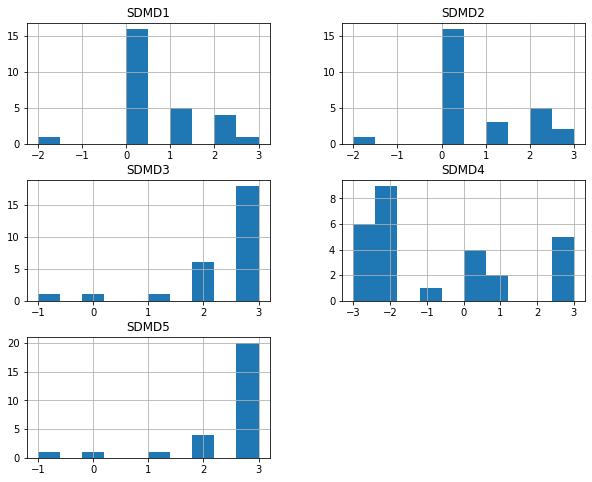

In [28]:
print_stats(data_sd_md, hist_size=(10,8))

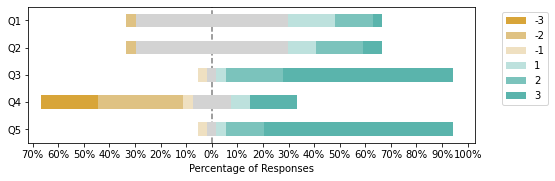

In [29]:
data_sd_md_likert = data_sd_md.copy()
data_sd_md_likert.columns = data_sd_md_likert.columns.str.replace('SDMD', 'Q')
ax = plot_likert.plot_likert(pd.DataFrame(data_sd_md_likert), np.arange(-3,4), plot_percentage=True, colors=plot_likert.colors.likert7, figsize=(8,2.5));
ax.figure.savefig('out/juxtboard-sd-cd.pdf', bbox_inches='tight')

#### Confidence Intervals

In [30]:
for question in data_sd_md:
    print(question, 
          'Median:', data_sd_md[question].median(), 
          'Mean:', data_sd_md[question].mean(),
          'Standard Deviation:', data_sd_md[question].std(),
          'Confidence Interval:', confidence_interval_t(data_sd_md[question]))

SDMD1 Median: 0.0 Mean: 0.5185185185185185 Standard Deviation: 1.0141449740988853 Confidence Interval: (0.11733612821709671, 0.9197009088199403)
SDMD2 Median: 0.0 Mean: 0.6296296296296297 Standard Deviation: 1.1485157025867427 Confidence Interval: (0.1752919494849574, 1.083967309774302)
SDMD3 Median: 3.0 Mean: 2.4444444444444446 Standard Deviation: 1.012739367083667 Confidence Interval: (2.043818093759243, 2.8450707951296463)
SDMD4 Median: -2.0 Mean: -0.7407407407407407 Standard Deviation: 2.1766698734286143 Confidence Interval: (-1.6018026648459212, 0.12032118336443987)
SDMD5 Median: 3.0 Mean: 2.5185185185185186 Standard Deviation: 1.014144974098885 Confidence Interval: (2.117336128217097, 2.9197009088199404)


### Response Frequency

In [31]:
data_sd_md_freq = data['SD vs. MD'].copy().dropna()
data_sd_md_freq.iloc[:,0:5] = data_sd_md_freq.iloc[:,0:5] - 4
data_sd_md_freq_res = (data_sd_md_freq.apply(pd.value_counts).fillna(0)/data_sd_md_freq.count()*100).transpose()
data_sd_md_freq_res

,-3,-2,-1,0,1,2,3
SDMD1,0.000000,3.703704,0.000000,59.259259,18.518519,14.814815,3.703704
SDMD2,0.000000,3.703704,0.000000,59.259259,11.111111,18.518519,7.407407
SDMD3,0.000000,0.000000,3.703704,3.703704,3.703704,22.222222,66.666667
SDMD4,22.222222,33.333333,3.703704,14.814815,7.407407,0.000000,18.518519
SDMD5,0.000000,0.000000,3.703704,3.703704,3.703704,14.814815,74.074074


In [32]:
data_sd_md_freq_res.to_csv('out/juxtboard-data_sd_md_freq_res.csv')
data_sd_md_freq.describe()

,SDMD1,SDMD2,SDMD3,SDMD4,SDMD5
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.518519,0.629630,2.444444,-0.740741,2.518519
std,1.014145,1.148516,1.012739,2.176670,1.014145
min,-2.000000,-2.000000,-1.000000,-3.000000,-1.000000
25%,0.000000,0.000000,2.000000,-2.000000,2.500000
50%,0.000000,0.000000,3.000000,-2.000000,3.000000
75%,1.000000,1.500000,3.000000,0.500000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000


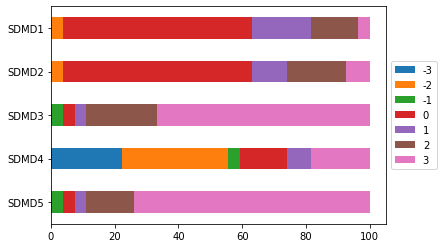

In [33]:
data_sd_md_freq_res.iloc[::-1].plot.barh(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [34]:
# Multi-Device Preference vs. Neutrality + Single Device Preference
data_sd_md_md_pref = (data_sd_md > 0).sum()
data_sd_md_neutral_or_sd_pre = (data_sd_md <= 0).sum()
data_sd_md_md_pref_relative = data_sd_md_md_pref / (data_sd_md_md_pref + data_sd_md_neutral_or_sd_pre)

# Single Device Preference vs. Neutrality + Cross-Device Preference
data_sd_md_sd_pref = (data_sd_md < 0).sum()
data_sd_md_neutral_or_md_pre = (data_sd_md <= 0).sum()
data_sd_md_sd_pref_relative = data_sd_md_sd_pref / (data_sd_md_sd_pref + data_sd_md_neutral_or_md_pre)

In [35]:
print('Cross-Device Preference vs. Neutrality + Single Device Preference')
for question in data_sd_md:
    print(question, 
          'Relative Frequency:',
          data_sd_md_md_pref_relative[question], 
          'Confidence Interval:',
          smp.proportion_confint(data_sd_md_md_pref[question], data_sd_md_md_pref[question]+data_sd_md_neutral_or_sd_pre[question], alpha=0.05, method='wilson'))

print('\n')

print('Single Device Preference vs. Neutrality + Cross-Device Preference')
for question in data_sd_md:
    print(question,
          'Relative Frequency:',
          data_sd_md_sd_pref_relative[question],
          'Confidence Interval:',
          smp.proportion_confint(data_sd_md_sd_pref[question], data_sd_md_sd_pref[question]+data_sd_md_neutral_or_md_pre[question], alpha=0.05, method='wilson'))

Cross-Device Preference vs. Neutrality + Single Device Preference
SDMD1 Relative Frequency: 0.37037037037037035 Confidence Interval: (0.215325129609656, 0.5577076558789762)
SDMD2 Relative Frequency: 0.37037037037037035 Confidence Interval: (0.215325129609656, 0.5577076558789762)
SDMD3 Relative Frequency: 0.9259259259259259 Confidence Interval: (0.7663040731697686, 0.9794453459390113)
SDMD4 Relative Frequency: 0.25925925925925924 Confidence Interval: (0.1317037456190719, 0.4467857131455308)
SDMD5 Relative Frequency: 0.9259259259259259 Confidence Interval: (0.7663040731697686, 0.9794453459390113)


Single Device Preference vs. Neutrality + Cross-Device Preference
SDMD1 Relative Frequency: 0.05555555555555555 Confidence Interval: (0.009875190978303083, 0.257573007818726)
SDMD2 Relative Frequency: 0.05555555555555555 Confidence Interval: (0.009875190978303083, 0.257573007818726)
SDMD3 Relative Frequency: 0.3333333333333333 Confidence Interval: (0.06149194472039626, 0.7923403991979523)
SDMD

## General Use

#### Questions (Portuguese)
0. Normalmente, eu utilizo dois ou mais dispositivos em simultâneo no meu quotidiano.
1. O tempo que a aplicação demorou a reagir ao meu "input" foi adequado. 
2. A distância é uma boa medida do quão relacionados são dois dispositivos.
3. O tempo que o sistema demorou a reagir às alterações nas posições dos dispositivos foi adequado.
4. É fácil mudar a distribuição dos componentes da interface de acordo com as minhas necessidades.
5. Eu considero que a distribuição automática dos componentes da interface foi adequada.
6. *It was easy to add, rename, remove, share and unshare collections of notes in the application.*

In [36]:
data['General Use']['GU6'] = np.array([7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6])

data_general_use = data['General Use'].copy().dropna()
data_general_use['Score'] = data_general_use.iloc[:,0:5].sum(axis=1)
data_general_use['Score 100'] = data_general_use['Score'] * (100/35)
#data_general_use

--- Statistics ----


,GU1,GU2,GU3,GU4,GU5,GU6,Score,Score 100
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,6.444444,6.444444,6.370370,6.074074,6.259259,6.777778,31.592593,90.264550
std,0.640513,0.640513,0.741524,1.035000,0.902671,0.423659,3.201673,9.147638
min,5.000000,5.000000,4.000000,3.000000,4.000000,6.000000,23.000000,65.714286
25%,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,30.500000,87.142857
50%,7.000000,7.000000,6.000000,6.000000,6.000000,7.000000,32.000000,91.428571
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,34.500000,98.571429
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,35.000000,100.000000




--- Counting Unique Values ----


GU1  GU2  GU3  GU4  GU5  GU6  Score  Score 100 
7    7    7    7    7    7    35     100.000000    4
                         6    35     100.000000    3
     6    6    6    6    7    31     88.571429     2
6    7    6    7    7    7    33     94.285714     2
     6    6    6    6    7    30     85.714286     2
                    7    7    31     88.571429     1
               7    7    7    32     91.428571     1
          7    6    6    7    31     88.571429     1
     7    6    6    6    6    31     88.571429     1
                         7    31     88.571429     1
5    6    4    4    4    7    23     65.714286     1
6    7    7    6    6    7    32     91.428571     1
7    5    7    3    4    7    26     74.285714     1
     6    6    5    6    7    30     85.714286     1
          7    7    6    6    33     94.285714     1
     7    7    5    7    7    33     94.285714     1
               6    7    6    34     97.142857     1
6    6    6    5    5    7    28     80.000000     



--- Basic Histogram ----


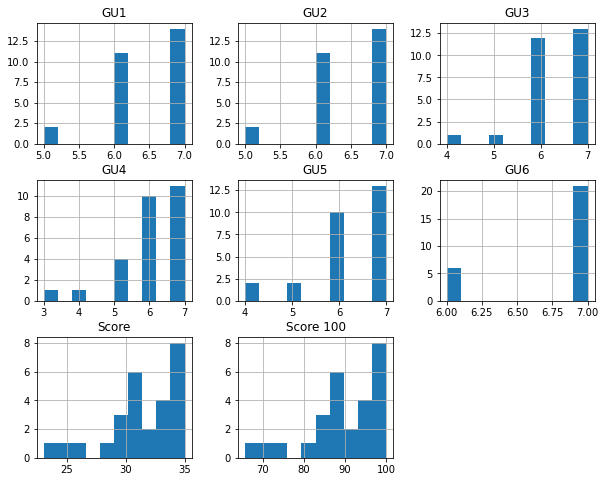

In [37]:
print_stats(data_general_use, hist_size=(10,8))

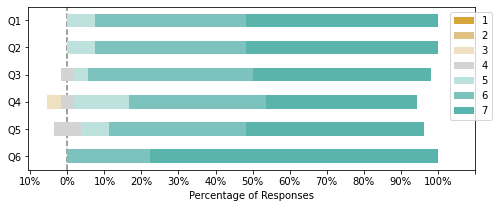

In [38]:
data_general_use_likert = data_general_use.copy().iloc[:,:6]
data_general_use_likert.columns = data_general_use_likert.columns.str.replace('GU', 'Q')
ax = plot_likert.plot_likert(pd.DataFrame(data_general_use_likert), np.arange(1,8), plot_percentage=True, colors=plot_likert.colors.likert7, figsize=(8,3));
ax.figure.savefig('out/juxtboard-ds.pdf', bbox_inches='tight')

#### Confidence Intervals

In [39]:
for column in data_general_use:
    print(column,
          'Median', data_general_use[column].median(),
          'Mean', data_general_use[column].mean(),
          'Standard Deviation',  data_general_use[column].std(), 
          'Confidence Interval', confidence_interval_t(data_general_use[column]))

GU1 Median 7.0 Mean 6.444444444444445 Standard Deviation 0.6405126152203487 Confidence Interval (6.1910660926751255, 6.697822796213764)
GU2 Median 7.0 Mean 6.444444444444445 Standard Deviation 0.6405126152203486 Confidence Interval (6.1910660926751255, 6.697822796213764)
GU3 Median 6.0 Mean 6.37037037037037 Standard Deviation 0.7415238026237252 Confidence Interval (6.077033323695839, 6.663707417044901)
GU4 Median 6.0 Mean 6.074074074074074 Standard Deviation 1.035000034408247 Confidence Interval (5.664641696681582, 6.483506451466567)
GU5 Median 6.0 Mean 6.2592592592592595 Standard Deviation 0.9026709338484404 Confidence Interval (5.9021745306003135, 6.6163439879182055)
GU6 Median 7.0 Mean 6.777777777777778 Standard Deviation 0.4236592728681617 Confidence Interval (6.610183751180513, 6.945371804375043)
Score Median 32.0 Mean 31.59259259259259 Standard Deviation 3.2016733516572624 Confidence Interval (30.326052797014032, 32.85913238817115)
Score 100 Median 91.42857142857143 Mean 90.26455

### Response Frequency

In [40]:
data_general_use_freq = pd.concat([data_basic['Usage of Multiple-Devices'], data['General Use']], axis=1)
data_general_use_freq = data_general_use_freq.rename(columns={"Usage of Multiple-Devices": "GU0"})
data_general_use_freq_res = (data_general_use_freq.apply(pd.value_counts).fillna(0)/data_general_use_freq.count()*100).transpose()
data_general_use_freq_res

,2,3,4,5,6,7
GU0,3.703704,3.703704,0.000000,22.222222,18.518519,51.851852
GU1,0.000000,0.000000,0.000000,7.407407,40.740741,51.851852
GU2,0.000000,0.000000,0.000000,7.407407,40.740741,51.851852
GU3,0.000000,0.000000,3.703704,3.703704,44.444444,48.148148
GU4,0.000000,3.703704,3.703704,14.814815,37.037037,40.740741
GU5,0.000000,0.000000,7.407407,7.407407,37.037037,48.148148
GU6,0.000000,0.000000,0.000000,0.000000,22.222222,77.777778


In [41]:
data_general_use_freq.to_csv('out/juxtboard-data_general_use_freq.csv')
data_general_use_freq.describe()

,GU0,GU1,GU2,GU3,GU4,GU5,GU6
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,6.037037,6.444444,6.444444,6.370370,6.074074,6.259259,6.777778
std,1.315046,0.640513,0.640513,0.741524,1.035000,0.902671,0.423659
min,2.000000,5.000000,5.000000,4.000000,3.000000,4.000000,6.000000
25%,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000
50%,7.000000,7.000000,7.000000,6.000000,6.000000,6.000000,7.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


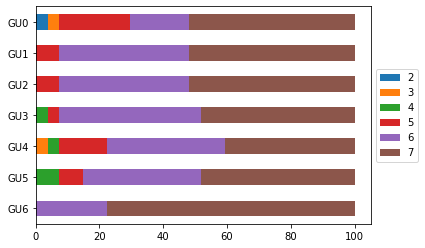

In [42]:
data_general_use_freq_res.iloc[::-1].plot.barh(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()